# 04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공한다. 이들 선형 모델 중 `규제가 적용되지 않은 선형 회귀`를 사이킷런에서 구현한 클래스인 LinearRegression을 이용해 보스턴 주택 가격 예측 회귀를 구현할 것이다.

### LinearRegression 클래스 - Ordinary Least Squares

`class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)`

LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Suqares)를 최소화하는 OLS(Ordinary Least Squares)추정 방식으로 구현한 클래스이다.

LinearRegression 클래스는 fit() 메서드로 X,y 배열을 입력받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장한다.

+ 입력파라미터
    + fit_intercept : 불린 값으로, 디폴트는 True이다. Intercept(절편) 값을 계산할 것인지 말지를 지정한다. 만일 False로 지정하면 intercept가 사용되지 않고 0으로 지정된다.
    ![fit_intercept](https://user-images.githubusercontent.com/98722581/170619692-b159df1e-6bc6-44cf-9d29-d397b7466fc4.png)
    + normalize : 불린 값으로 디폴트는 False이다. fit_intercept가 False인 경우에는 이 파라미터가 무시된다. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화 한다.
+ 속성
    + coef_ : fit()메서드를 수행했을 때 회귀 계수가 배열 형태로 저장되는 속성, Shape는 (Target 값 개수, 피처 개수)
    + intercept_ : intercept 값

### 선형 회귀의 다중 공선성 문제

+ 일반적으로 선형 회귀는 입력 피처의 독립성에 많은 영향을 받는다. 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이러한 현상을 다중 공선성(multi-collinearity) 문제라고 한다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립 적인 중요한 피처만 남기고 제거하거나 규제를 적용한다.

### 회귀 평가 지표

회귀 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다. 오류의 절대 값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구한다.

+ `MAE` : Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것이다.
![MAE](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded)
+ MSE : Mean Squared Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것이다.
![mse](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Foithd%2Fbtqz5yoyNoL%2FIuFkyjAuwPY935b4KmYjy0%2Fimg.png)
+ `RMSE` : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)이다.
![rmse](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbawPPb%2Fbtqz6IcS3PV%2FFh7BJdhJHecO4YRtweLOj1%2Fimg.png)
+ `RMSLE` : RMSE에 로그를 적용한 것이다. 결정값이 클 수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아준다.
![rmsle](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbndFxw%2Fbtqz5yWqJhg%2Fbwbeu20KrRAYbBdw2xBfVK%2Fimg.png)
+ R²: 분산 기반으로 예측 성능을 평가한다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다.
![rsquared](https://t1.daumcdn.net/cfile/tistory/99C2DB3359E1D3461B)

### MAE와 RMSE의 비교

MAE에 비해 RMSE는 큰 오류값에 상대적인 패널티를 더 부여한다.

예를 들어 다섯개의 오류값(실제값과 예측값의 차이)이 10, 20, 10, 10, 100과 같이 다른 값에 비해 큰 오류값이 존재하는 경우 RMSE는 전반적으로 MAE보다 높다.

MAE = (10+20+10+10+100)/5=30 이고 RMSE는 √(100+400+100+100+10000)/5 = √2140 = 46026

이처럼 상대적으로 더 큰 오류값이 있을 때 이에 대한 페널티를 더 부과하는 평가 방식이 RMSE이다.

### 사이킷런 회귀 평가 API

+ 다음은 각 평가 방법에 대한 사이킷런의 API 및 corsS_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값이다.

평가 방법 | 사이킷런 평가 지표 API | Scoring 함수 적용 값
----------|------------------------|---------------------
MAE | metrics.mean_absolute_error | 'neg_mean_absolute_error'
MSE | metrics.mean_squared_error | 'neg_mean_squared_error'
RMSE | metrics.mean_squared_error를 그대로 사용하되 squared 파라미터를 False로 설정 or np.sqrt(MSE) 사용 | 'net_root_mean_squared_error;
MSLE | metrics.mean_squared_log_error | 'neg_mean_squared_log_error'
R²| metrics.r2_score | 'r2'

즉 MSE는 사이킷런에서 mean_squared_error(실제값, 예측값, squared=True)이며 RMSE는 mean_squared_error(실제값, 예측값, squared=False)를 이용해서 구하거나 np.sqrt(MSE)로 구한다.

### 사이킷런 Scoring 함수에 회귀 평가 적용 시 유의 사항

+ MAE의 scoring 파라미터 값을 살펴보면 'neg_'라는 접두어가 붙어있다. 이는 Negative(음수)값을 가진다는 의미이다. MAE는 절대 값의 합이기 때문에 음수가 될 수 없다.

+ Scoring 함수에 'neg_mean_absolute_error'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다. 따라서 -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다. 예를 들어 10>1 이지만 음수를 곱하면 -1>-10이 된다.

+ metrics.mean_absolute_error()와 같은 사이킷런 평가 지표 API는 정상적으로 양수의 값을 반환한다. 하지만 Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 * metrics.mean_absoulte_error()이니 주의가 필요하다.

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

사이킷런에 내장된 데이터 세트인 보스턴 주택 가격 데이터를 이용한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


해당 피처에 대한 설명은 아래와 같다.

+ CRIM: 지역별 범죄 발생률
+ ZN: 25,000평방피트를 초과하는 거주 지역의 비율
+ NDUS: 비상업 지역 넓이 비율
+ CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
+ NOX: 일산화질소 농도
+ RM: 거주할 수 있는 방 개수
+ AGE: 1940년 이전에 건축된 소유 주택의 비율
+ DIS: 5개 주요 고용센터까지의 가중 거리
+ RAD: 고속도로 접근 용이도
+ TAX: 10,000달러당 재산세율
+ PTRATIO: 지역의 교사와 학생 수 비율
+ B: 지역의 흑인 거주 비율
+ LSTAT: 하위 계층의 비율
+ MEDV: 본인 소유의 주택 가격(중앙값)

In [2]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


__각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 알아본다.__

'RM','ZN','INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'의 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인한다.
Seaborn의 regplot() 함수는 X,Y축 값의 산점도와 함께 선형 회귀 직선을 그려준다. matplotlib.subplots()를 이용해 각 ax마다 칼럼과 price의 관계를 표현한다.

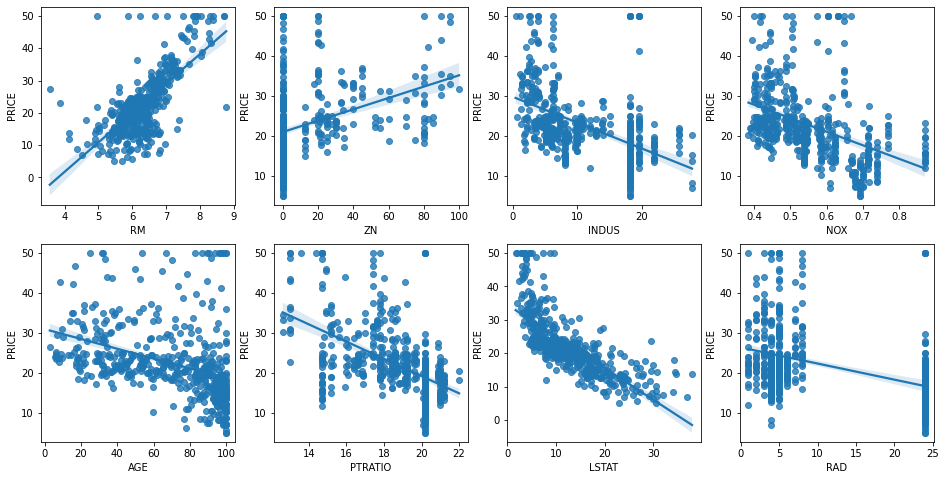

In [4]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다. RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 커서 방의 크기가 클수록 가격이 증가하는 모습을 보여준다. LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 커서 LSTAT이 적을 수록 PRICE가 증가하는 모습이 나타난다.

__회귀 모델 만들기__

LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만든다. trian_test_split()을 이용해 학습과 테스트 데이터 세트를 분리해 학습과 예측을 수행한다. 그리고 metrics 모듈의 mean_squared_error()와 r2_score() API를 이용해 MSE와 R2 Score를 측정한다.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [6]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커보인다. 차츰 최적화를 수행하며 피처 coefficients의 변화도 같이 살펴본다.

__5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정한다.__

MSE 수치 결과를 RMSE로 변환하여 사용한다. 

corss_val_score()의 인자로 scoring='neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수 값이므로 cross_val_score()에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 된다. 

이렇게 다시 변환된 MSE값에 넘파이의 sqrt()함수를 적용해 RMSE를 구할 수 있다. 

In [8]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
